In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

In [30]:
url = "https://raw.githubusercontent.com/AnnaNebuko/ABD-PRJ-25-2team-HAPPINESS/main/data_cleaned.csv"
df = pd.read_csv(url)
df = df.drop('Unnamed: 0', axis=1)
df.head()

idno  agea  rlgdgr  polintr  sclmeet  happy cntry  nwspol  pplfair  \
0  50030  21.0     0.0      2.0      7.0    9.0    AT    90.0      0.0   
1  50057  53.0     8.0      2.0      4.0    9.0    AT    30.0      9.0   
2  50106  78.0     6.0      3.0      6.0    7.0    AT    15.0      6.0   
3  50145  64.0     1.0      2.0      5.0    9.0    AT    60.0      3.0   
4  50158  59.0     3.0      2.0      6.0    8.0    AT   120.0      8.0   

   health  ...  actrolga  cptppola  trstprl  trstlgl  trstplc  trstplt  vote  \
0     2.0  ...       2.0       2.0      6.0      6.0      4.0      1.0   1.0   
1     1.0  ...       4.0       3.0      7.0      5.0      8.0      4.0   1.0   
2     3.0  ...       2.0       3.0      5.0      6.0      9.0      3.0   2.0   
3     2.0  ...       1.0       3.0      6.0      8.0      8.0      5.0   1.0   
4     1.0  ...       3.0       3.0      3.0      5.0      7.0      5.0   1.0   

   stfeco  stfdem  stfedu  
0     2.0     7.0    10.0  
1     6.0     6.0     5.0  
2     4.0     6.0     5.0  
3     6.0     8.0     9.0  
4     4.0     3.0     3.0  

[5 rows x 46 columns]

In [31]:
df['happy'] = df['happy'].astype(int)

X = df.drop('happy', axis=1)
y = df['happy']

In [32]:
# –∑–∞–∫–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
X = pd.get_dummies(X, columns=['cntry', 'gndr'], drop_first=True)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel


# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model = OrderedModel(y, X_scaled_df, distr='logit') 
result = model.fit(method='bfgs') 

print(result.summary())

Optimization terminated successfully.
         Current function value: 1.517116
         Iterations: 86
         Function evaluations: 87
         Gradient evaluations: 87
                             OrderedModel Results                             
Dep. Variable:                  happy   Log-Likelihood:                -18573.
Model:                   OrderedModel   AIC:                         3.727e+04
Method:            Maximum Likelihood   BIC:                         3.774e+04
Date:                Thu, 12 Jun 2025                                         
Time:                        10:29:09                                         
No. Observations:               12242                                         
Df Residuals:                   12179                                         
Df Model:                          53                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [ ]:
# –°–æ–∑–¥–∞–µ–º DataFrame –∏–∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏
df_results = pd.DataFrame({
    'coef': result.params,
    'std_err': result.bse,
    'z_value': result.tvalues,
    'p_value': result.pvalues,
    'ci_lower': result.conf_int()[0],
    'ci_upper': result.conf_int()[1]
})

# –î–æ–±–∞–≤–ª—è–µ–º –Ω–∞–∑–≤–∞–Ω–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
df_results.index = result.model.exog_names


df_results.sort_values('coef').head(10)

coef   std_err    z_value        p_value  ci_lower  ci_upper
0/1    -7.865869  0.221236 -35.554215  7.151563e-277 -8.299484 -7.432255
4/5    -0.349998  0.067746  -5.166303   2.387692e-07 -0.482778 -0.217217
health -0.316640  0.020750 -15.259370   1.426184e-52 -0.357310 -0.275969
fltdpr -0.273341  0.021094 -12.958076   2.114857e-38 -0.314685 -0.231997
1/2    -0.251025  0.210344  -1.193404   2.327112e-01 -0.663292  0.161241
...          ...       ...        ...            ...       ...       ...
stfeco  0.238378  0.023814  10.010079   1.376419e-23  0.191704  0.285052
7/8     0.342189  0.019663  17.402700   7.870483e-68  0.303650  0.380727
9/10    0.523299  0.017910  29.218673  1.123239e-187  0.488197  0.558402
8/9     0.638723  0.014155  45.124971   0.000000e+00  0.610981  0.666466
enjlf   0.658730  0.020344  32.379638  5.311201e-230  0.618857  0.698604

[63 rows x 6 columns]

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç, –∫–∞–∫ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–∞ –Ω–∞ 1 –µ–¥–∏–Ω–∏—Ü—É –≤–ª–∏—è–µ—Ç –Ω–∞ –ª–æ–≥–∞—Ä–∏—Ñ–º —à–∞–Ω—Å–æ–≤ (log-odds) –æ–∫–∞–∑–∞—Ç—å—Å—è –≤ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Å—á–∞—Å—Ç—å—è.

- –°–∞–º—ã–µ –∑–Ω–∞—á–∏–º—ã–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ —Ñ–∞–∫—Ç–æ—Ä—ã (+):
enjlf (0.659, p<0.001) - –£–¥–æ–≤–æ–ª—å—Å—Ç–≤–∏–µ –æ—Ç –∂–∏–∑–Ω–∏

atchctr (0.231, p<0.001) - –ü—Ä–∏–≤—è–∑–∞–Ω–Ω–æ—Å—Ç—å –∫ —Å—Ç—Ä–∞–Ω–µ

stfeco (0.238, p<0.001) - –£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å —ç–∫–æ–Ω–æ–º–∏–∫–æ–π

trstplc (0.164, p<0.001) - –î–æ–≤–µ—Ä–∏–µ –ø–æ–ª–∏—Ü–∏–∏

pplfair (0.142, p<0.001) - –í–µ—Ä–∞ –≤ —á–µ—Å—Ç–Ω–æ—Å—Ç—å –ª—é–¥–µ–π

- –°–∞–º—ã–µ –∑–Ω–∞—á–∏–º—ã–µ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ–∞–∫—Ç–æ—Ä—ã (-):
health (-0.317, p<0.001) - –ü–ª–æ—Ö–æ–µ –∑–¥–æ—Ä–æ–≤—å–µ

fltdpr (-0.273, p<0.001) - –ß—É–≤—Å—Ç–≤–æ –¥–µ–ø—Ä–µ—Å—Å–∏–∏

fltlnl (-0.235, p<0.001) - –ß—É–≤—Å—Ç–≤–æ –æ–¥–∏–Ω–æ—á–µ—Å—Ç–≤–∞

cntry_GR (-0.240, p<0.001) - –ü—Ä–æ–∂–∏–≤–∞–Ω–∏–µ –≤ –ì—Ä–µ—Ü–∏–∏ (–æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –±–∞–∑–æ–≤–æ–π —Å—Ç—Ä–∞–Ω—ã)

hincfel (-0.210, p<0.001) - –§–∏–Ω–∞–Ω—Å–æ–≤—ã–µ —Ç—Ä—É–¥–Ω–æ—Å—Ç–∏



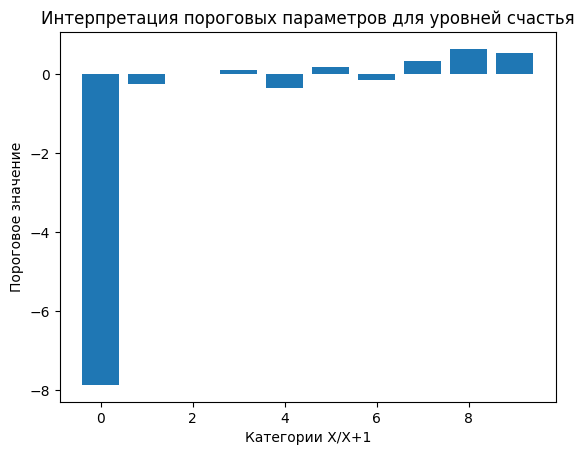

In [105]:
# –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –ø–æ—Ä–æ–≥–æ–≤—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
thresholds = result.params[-10:]  # –ü–æ—Å–ª–µ–¥–Ω–∏–µ 10 –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ ‚Äî –ø–æ—Ä–æ–≥–∏
plt.bar(range(10), thresholds)
plt.title('–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –ø–æ—Ä–æ–≥–æ–≤—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è —É—Ä–æ–≤–Ω–µ–π —Å—á–∞—Å—Ç—å—è')
plt.xlabel("–ö–∞—Ç–µ–≥–æ—Ä–∏–∏ X/X+1")
plt.ylabel("–ü–æ—Ä–æ–≥–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ")
plt.show()

–°–∞–º—ã–π —Ä–µ–∑–∫–∏–π –ø–µ—Ä–µ—Ö–æ–¥:

0/1 = -7.866 ‚Äî –æ–≥—Ä–æ–º–Ω—ã–π –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥. –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –ª—é–¥–∏ –æ—á–µ–Ω—å —Ä–µ–¥–∫–æ –≤—ã–±–∏—Ä–∞—é—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏—é 0 (–∫—Ä–∞–π–Ω—è—è –Ω–µ—Å—á–∞—Å—Ç–ª–∏–≤–æ—Å—Ç—å), –∏ –¥–∞–∂–µ –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤ "–ø–µ—Ä–µ–≤–æ–¥—è—Ç" –∏—Ö –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏—é 1.

8/9 = 0.639 ‚Äî —Å–∞–º—ã–π –±–æ–ª—å—à–æ–π –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π —Å–∫–∞—á–æ–∫. –ü–µ—Ä–µ—Ö–æ–¥ –æ—Ç 8 –∫ 9 —Ç—Ä–µ–±—É–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ–≥–æ —É–¥–æ–≤–æ–ª—å—Å—Ç–≤–∏—è –æ—Ç –∂–∏–∑–Ω–∏ enjlf).

–°–∞–º—ã–µ –∑–Ω–∞—á–∏–º—ã–µ –ø–æ—Ä–æ–≥–∏ (p < 0.001):

4/5 = -0.35 ‚Äî –±–∞—Ä—å–µ—Ä –º–µ–∂–¥—É "—É–º–µ—Ä–µ–Ω–Ω–æ –Ω–µ—Å—á–∞—Å—Ç–ª–∏–≤—ã–º–∏" (4) –∏ "–Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã–º–∏" (5).

5/6 = 0.184 ‚Äî –ø–µ—Ä–µ—Ö–æ–¥ –æ—Ç "–Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö" (5) –∫ "—Å–ª–µ–≥–∫–∞ —Å—á–∞—Å—Ç–ª–∏–≤—ã–º" (6).

7/8 = 0.342 –∏ 8/9 = 0.639 ‚Äî —Ç—Ä–µ–±—É—é—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã—Ö —É—Å–∏–ª–∏–π –¥–ª—è –ø–µ—Ä–µ—Ö–æ–¥–∞ –º–µ–∂–¥—É –≤—ã—Å–æ–∫–∏–º–∏ —É—Ä–æ–≤–Ω—è–º–∏ —Å—á–∞—Å—Ç—å—è.

–ù–µ–∑–Ω–∞—á–∏–º—ã–µ –ø–æ—Ä–æ–≥–∏ (p > 0.05):

1/2 = -0.251 (p=0.233)

2/3 = 0.010 (p=0.934)

3/4 = 0.095 (p=0.217)
–≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É —ç—Ç–∏–º–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ —Å–ª–∞–±–æ –≤—ã—Ä–∞–∂–µ–Ω–∞, –∏ –º–æ–¥–µ–ª—å –ø–ª–æ—Ö–æ –∏—Ö —Ä–∞–∑–¥–µ–ª—è–µ—Ç.

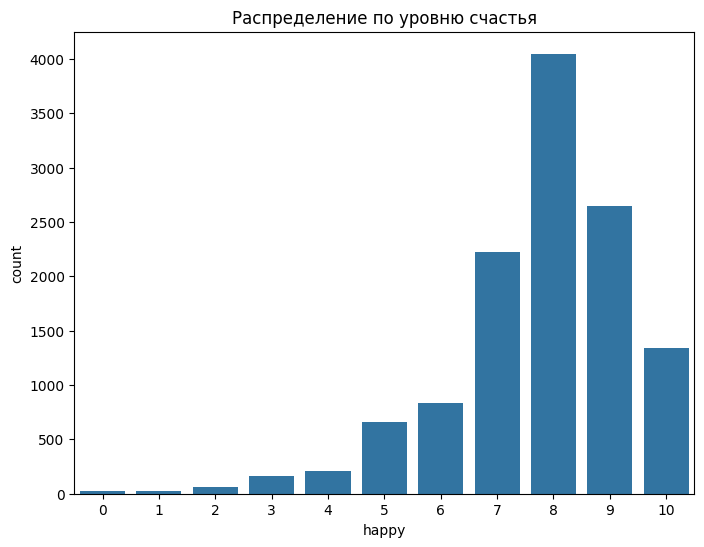

In [106]:
fig = plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='happy')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —É—Ä–æ–≤–Ω—é —Å—á–∞—Å—Ç—å—è')
plt.show()

In [ ]:
# –û–±—ä–µ–¥–∏–Ω–∏–º —É—Ä–æ–≤–µ–Ω—å —Å—á–∞—Å—Ç—å—è –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
df['happiness_group'] = pd.cut(
    df['happy'],  
    bins=[-1, 4, 7, 10],  # –ì—Ä–∞–Ω–∏—Ü—ã: (-1,4], (4,7], (7,10]
    labels=['low', 'medium', 'high']  
)

print(df['happiness_group'].value_counts(normalize=True))

happiness_group
high      0.656755
medium    0.304035
low       0.039209
Name: proportion, dtype: float64


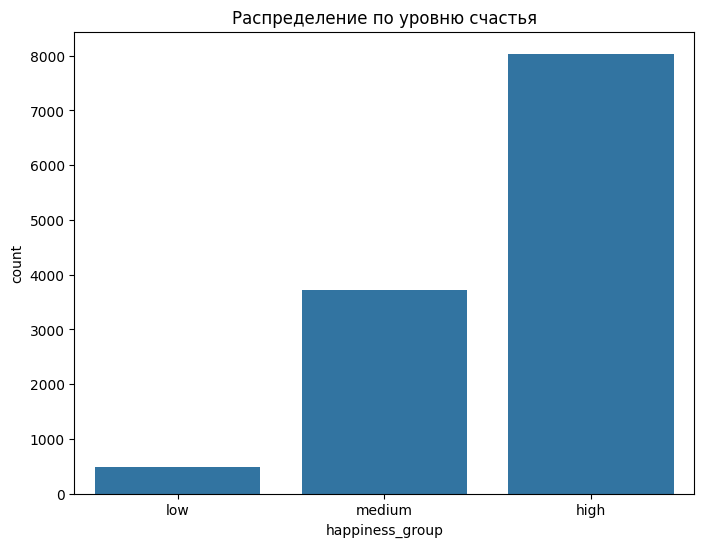

In [107]:
fig = plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='happiness_group')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —É—Ä–æ–≤–Ω—é —Å—á–∞—Å—Ç—å—è')
plt.show()

In [109]:
# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏

model_w_cat = OrderedModel(df['happiness_group'], X_scaled_df, distr='logit')  
result_w_cat = model_w_cat.fit(method='bfgs') 


print(result_w_cat.summary())

Optimization terminated successfully.
         Current function value: 0.584389
         Iterations: 39
         Function evaluations: 40
         Gradient evaluations: 40
                             OrderedModel Results                             
Dep. Variable:        happiness_group   Log-Likelihood:                -7154.1
Model:                   OrderedModel   AIC:                         1.442e+04
Method:            Maximum Likelihood   BIC:                         1.483e+04
Date:                Thu, 12 Jun 2025                                         
Time:                        10:44:28                                         
No. Observations:               12242                                         
Df Residuals:                   12187                                         
Df Model:                          53                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

In [ ]:
# –°–æ–∑–¥–∞–µ–º DataFrame –∏–∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏
df_results_w_cat = pd.DataFrame({
    'coef': result_w_cat.params,
    'std_err': result_w_cat.bse,
    'z_value': result_w_cat.tvalues,
    'p_value': result_w_cat.pvalues,
    'ci_lower': result_w_cat.conf_int()[0],
    'ci_upper': result_w_cat.conf_int()[1]
})

# –î–æ–±–∞–≤–ª—è–µ–º –Ω–∞–∑–≤–∞–Ω–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
df_results_w_cat.index = result_w_cat.model.exog_names



coef   std_err    z_value        p_value  ci_lower  ci_upper
health   -0.301299  0.026282 -11.464120   1.997792e-30 -0.352810 -0.249787
fltdpr   -0.261533  0.025013 -10.455681   1.380039e-25 -0.310558 -0.212507
fltlnl   -0.228868  0.023240  -9.848193   6.978713e-23 -0.274416 -0.183319
hincfel  -0.225718  0.024428  -9.240253   2.459156e-20 -0.273595 -0.177840
cntry_GR -0.216904  0.028367  -7.646225   2.069654e-14 -0.272503 -0.161305
cntry_FR -0.164696  0.031356  -5.252486   1.500602e-07 -0.226153 -0.103240
gndr_1   -0.152027  0.032121  -4.732905   2.213295e-06 -0.214983 -0.089070
iphlppla -0.115536  0.023107  -5.000024   5.732319e-07 -0.160825 -0.070247
impfuna  -0.101015  0.025086  -4.026711   5.656258e-05 -0.150183 -0.051847
cntry_CY -0.095071  0.024583  -3.867401   1.100013e-04 -0.143252 -0.046890
trstprl  -0.065880  0.036444  -1.807707   7.065205e-02 -0.137309  0.005549
vote     -0.053853  0.023787  -2.263906   2.357987e-02 -0.100475 -0.007230
aesfdrk  -0.051010  0.023584  -2.162900   3.054884e-02 -0.097233 -0.004786
height   -0.040796  0.034982  -1.166211   2.435291e-01 -0.109359  0.027767
uempla   -0.037219  0.020363  -1.827760   6.758551e-02 -0.077131  0.002692
cntry_GB -0.034043  0.028018  -1.215065   2.243415e-01 -0.088957  0.020870
dscrgrp  -0.028516  0.021403  -1.332290   1.827649e-01 -0.070465  0.013434
nwspol   -0.020548  0.023083  -0.890171   3.733740e-01 -0.065789  0.024694
stfdem   -0.009789  0.032515  -0.301047   7.633785e-01 -0.073517  0.053939
trstplt  -0.008758  0.035815  -0.244542   8.068109e-01 -0.078955  0.061438
polintr  -0.006595  0.026983  -0.244391   8.069281e-01 -0.059481  0.046292
pray     -0.005177  0.032183  -0.160861   8.722031e-01 -0.068255  0.057901
actrolga -0.005061  0.030606  -0.165362   8.686591e-01 -0.065049  0.054926
impdiffa -0.002897  0.024803  -0.116810   9.070103e-01 -0.051511  0.045716
cntry_CH -0.002191  0.030523  -0.071797   9.427638e-01 -0.062016  0.057633
impsafea -0.000679  0.024107  -0.028169   9.775271e-01 -0.047929  0.046571
idno      0.000083  0.022977   0.003600   9.971273e-01 -0.044951  0.045117
slprl     0.001435  0.023580   0.060876   9.514576e-01 -0.044780  0.047651
emplrel   0.002002  0.022153   0.090371   9.279928e-01 -0.041417  0.045421
dosprt    0.003700  0.022991   0.160951   8.721316e-01 -0.041362  0.048763
trstlgl   0.004543  0.033405   0.135998   8.918230e-01 -0.060930  0.070016
fnsdfml   0.010328  0.024751   0.417265   6.764846e-01 -0.038183  0.058838
cgtsmok   0.018061  0.022626   0.798246   4.247276e-01 -0.026285  0.062407
ipsucesa  0.019236  0.024942   0.771233   4.405687e-01 -0.029649  0.068122
paccnt    0.022810  0.022195   1.027711   3.040860e-01 -0.020692  0.066312
alcfreq   0.024559  0.023707   1.035972   3.002153e-01 -0.021905  0.071023
cntry_BE  0.024920  0.031076   0.801883   4.226208e-01 -0.035989  0.085828
cnfpplh   0.065651  0.024376   2.693312   7.074607e-03  0.017876  0.113426
rlgdgr    0.066544  0.031165   2.135195   3.274505e-02  0.005461  0.127627
cptppola  0.072202  0.030543   2.363960   1.808075e-02  0.012339  0.132065
cntry_ES  0.073897  0.031417   2.352151   1.866521e-02  0.012321  0.135473
sclmeet   0.075182  0.022979   3.271826   1.068552e-03  0.030145  0.120220
weighta   0.080916  0.028211   2.868212   4.127991e-03  0.025623  0.136209
cntry_FI  0.088725  0.032811   2.704167   6.847593e-03  0.024418  0.153033
stfedu    0.097610  0.028177   3.464136   5.319380e-04  0.042384  0.152837
cntry_DE  0.117174  0.034476   3.398733   6.769886e-04  0.049603  0.184746
agea      0.129979  0.029456   4.412630   1.021225e-05  0.072246  0.187712
pplfair   0.136771  0.024426   5.599418   2.150726e-08  0.088897  0.184645
hhmmb     0.136923  0.024943   5.489541   4.029798e-08  0.088037  0.185809
trstplc   0.163756  0.029315   5.586054   2.322869e-08  0.106299  0.221212
atchctr   0.215138  0.024235   8.877059   6.865140e-19  0.167638  0.262639
stfeco    0.284268  0.030957   9.182657   4.205840e-20  0.223593  0.344943
enjlf     0.637981  0.025627  24.894742

In [ ]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –≤–µ—Å–∞ —Å—Ç–∞—Ç–∑–Ω–∞—á–∏–º—ã—Ö –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤
mask = df_results_w_cat['p_value'] < 0.05

df_results_w_cat[mask][:-2].sort_values('coef', ascending=False)

coef   std_err    z_value        p_value  ci_lower  ci_upper
enjlf     0.637981  0.025627  24.894742  8.482561e-137  0.587752  0.688209
stfeco    0.284268  0.030957   9.182657   4.205840e-20  0.223593  0.344943
atchctr   0.215138  0.024235   8.877059   6.865140e-19  0.167638  0.262639
trstplc   0.163756  0.029315   5.586054   2.322869e-08  0.106299  0.221212
hhmmb     0.136923  0.024943   5.489541   4.029798e-08  0.088037  0.185809
pplfair   0.136771  0.024426   5.599418   2.150726e-08  0.088897  0.184645
agea      0.129979  0.029456   4.412630   1.021225e-05  0.072246  0.187712
cntry_DE  0.117174  0.034476   3.398733   6.769886e-04  0.049603  0.184746
stfedu    0.097610  0.028177   3.464136   5.319380e-04  0.042384  0.152837
cntry_FI  0.088725  0.032811   2.704167   6.847593e-03  0.024418  0.153033
weighta   0.080916  0.028211   2.868212   4.127991e-03  0.025623  0.136209
sclmeet   0.075182  0.022979   3.271826   1.068552e-03  0.030145  0.120220
cntry_ES  0.073897  0.031417   2.352151   1.866521e-02  0.012321  0.135473
cptppola  0.072202  0.030543   2.363960   1.808075e-02  0.012339  0.132065
rlgdgr    0.066544  0.031165   2.135195   3.274505e-02  0.005461  0.127627
cnfpplh   0.065651  0.024376   2.693312   7.074607e-03  0.017876  0.113426
aesfdrk  -0.051010  0.023584  -2.162900   3.054884e-02 -0.097233 -0.004786
vote     -0.053853  0.023787  -2.263906   2.357987e-02 -0.100475 -0.007230
cntry_CY -0.095071  0.024583  -3.867401   1.100013e-04 -0.143252 -0.046890
impfuna  -0.101015  0.025086  -4.026711   5.656258e-05 -0.150183 -0.051847
iphlppla -0.115536  0.023107  -5.000024   5.732319e-07 -0.160825 -0.070247
gndr_1   -0.152027  0.032121  -4.732905   2.213295e-06 -0.214983 -0.089070
cntry_FR -0.164696  0.031356  -5.252486   1.500602e-07 -0.226153 -0.103240
cntry_GR -0.216904  0.028367  -7.646225   2.069654e-14 -0.272503 -0.161305
hincfel  -0.225718  0.024428  -9.240253   2.459156e-20 -0.273595 -0.177840
fltlnl   -0.228868  0.023240  -9.848193   6.978713e-23 -0.274416 -0.183319
fltdpr   -0.261533  0.025013 -10.455681   1.380039e-25 -0.310558 -0.212507
health   -0.301299  0.026282 -11.464120   1.997792e-30 -0.352810 -0.249787

Log-Likelihood: -7154.1 (–ª—É—á—à–µ, —á–µ–º –≤ –∏—Å—Ö–æ–¥–Ω–æ–π –º–æ–¥–µ–ª–∏ —Å 10 —É—Ä–æ–≤–Ω—è–º–∏)

AIC/BIC: 1.442e+04 / 1.483e+04 (—É–º–µ–Ω—å—à–∏–ª–∏—Å—å, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —É–ª—É—á—à–µ–Ω–∏–µ)

–ü–æ—Ä–æ–≥–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:

low/medium: -4.289 (p<0.001) ‚Äî —Ä–µ–∑–∫–∏–π –ø–µ—Ä–µ—Ö–æ–¥ –º–µ–∂–¥—É –Ω–∏–∑–∫–∏–º –∏ —Å—Ä–µ–¥–Ω–∏–º —É—Ä–æ–≤–Ω–µ–º

medium/high: 1.239 (p<0.001) ‚Äî –∑–Ω–∞—á–∏–º—ã–π, –Ω–æ –º–µ–Ω–µ–µ –≤—ã—Ä–∞–∂–µ–Ω–Ω—ã–π —Å–∫–∞—á–æ–∫ –∫ –≤—ã—Å–æ–∫–æ–º—É —É—Ä–æ–≤–Ω—é

–£—Å–∏–ª–∏–ª–æ—Å—å –≤–ª–∏—è–Ω–∏–µ:

stfeco (+0.284 vs +0.238) ‚Äî —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–∞—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å —Å—Ç–∞–ª–∞ –≤–∞–∂–Ω–µ–µ

gndr_1 (-0.152 vs -0.109) ‚Äî –≥–µ–Ω–¥–µ—Ä–Ω—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –±–æ–ª–µ–µ –≤—ã—Ä–∞–∂–µ–Ω—ã

–û—Å–ª–∞–±–µ–ª–æ –≤–ª–∏—è–Ω–∏–µ:

aesfdrk (-0.051 vs -0.061) ‚Äî —Å—Ç—Ä–∞—Ö –ø–µ—Ä–µ–¥ –ø—Ä–µ—Å—Ç—É–ø–Ω–æ—Å—Ç—å—é –º–µ–Ω–µ–µ –∑–Ω–∞—á–∏–º

alcfreq (+0.025 vs +0.069) ‚Äî —á–∞—Å—Ç–æ—Ç–∞ —É–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è –∞–ª–∫–æ–≥–æ–ª—è –ø–æ—Ç–µ—Ä—è–ª–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç—å

cntry_GR	-0.216904	0.028367	-7.646225	2.069654e-14	-0.272503	-0.161305
hincfel	-0.225718	0.024428	-9.240253	2.459156e-20	-0.273595	-0.177840
fltlnl	-0.228868	0.023240	-9.848193	6.978713e-23	-0.274416	-0.183319
fltdpr	-0.261533	0.025013	-10.455681	1.380039e-25	-0.310558	-0.212507
health	-0.301299

–°–ø–∏—Å–æ–∫ –∑–Ω–∞—á–∏–º—ã—Ö –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤ —É—Ä–æ–≤–Ω—è —Å—á–∞—Å—Ç—å—è

1. –°–∏–ª—å–Ω–µ–π—à–∏–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ —ç—Ñ—Ñ–µ–∫—Ç—ã
(‚Üë –£–≤–µ–ª–∏—á–∏–≤–∞—é—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –≤—ã—Å–æ–∫–æ–≥–æ —É—Ä–æ–≤–Ω—è —Å—á–∞—Å—Ç—å—è)

enjlf (0.638, p<0.001) ‚Äî –£–¥–æ–≤–æ–ª—å—Å—Ç–≤–∏–µ –æ—Ç –∂–∏–∑–Ω–∏

stfeco (0.284, p<0.001) ‚Äî –£–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å —ç–∫–æ–Ω–æ–º–∏–∫–æ–π

atchctr (0.215, p<0.001) ‚Äî –ü—Ä–∏–≤—è–∑–∞–Ω–Ω–æ—Å—Ç—å –∫ —Å—Ç—Ä–∞–Ω–µ

trstplc (0.164, p<0.001) ‚Äî –î–æ–≤–µ—Ä–∏–µ –ø–æ–ª–∏—Ü–∏–∏

hhmmb (0.137, p<0.001) ‚Äî –†–∞–∑–º–µ—Ä –¥–æ–º–æ—Ö–æ–∑—è–π—Å—Ç–≤–∞

pplfair (0.137, p<0.001) ‚Äî –í–µ—Ä–∞ –≤ —á–µ—Å—Ç–Ω–æ—Å—Ç—å –ª—é–¥–µ–π

2. –°–∏–ª—å–Ω–µ–π—à–∏–µ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ —ç—Ñ—Ñ–µ–∫—Ç—ã
(‚Üì –ü–æ–≤—ã—à–∞—é—Ç —Ä–∏—Å–∫ –Ω–∏–∑–∫–æ–≥–æ —É—Ä–æ–≤–Ω—è —Å—á–∞—Å—Ç—å—è)

health (-0.301, p<0.001) ‚Äî –ü–ª–æ—Ö–æ–µ –∑–¥–æ—Ä–æ–≤—å–µ

fltdpr (-0.262, p<0.001) ‚Äî –ß—É–≤—Å—Ç–≤–æ –¥–µ–ø—Ä–µ—Å—Å–∏–∏

fltlnl (-0.229, p<0.001) ‚Äî –ß—É–≤—Å—Ç–≤–æ –æ–¥–∏–Ω–æ—á–µ—Å—Ç–≤–∞

hincfel (-0.226, p<0.001) ‚Äî –§–∏–Ω–∞–Ω—Å–æ–≤—ã–µ —Ç—Ä—É–¥–Ω–æ—Å—Ç–∏

cntry_GR (-0.217, p<0.001) ‚Äî –ü—Ä–æ–∂–∏–≤–∞–Ω–∏–µ –≤ –ì—Ä–µ—Ü–∏–∏ (vs –±–∞–∑–æ–≤–∞—è —Å—Ç—Ä–∞–Ω–∞)

gndr_1 (-0.152, p<0.001) ‚Äî –ú—É–∂—á–∏–Ω—ã (vs –∂–µ–Ω—â–∏–Ω—ã)


üîπ –ù–µ–∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä—ã (p > 0.05, –º–æ–∂–Ω–æ –∏—Å–∫–ª—é—á–∏—Ç—å –∏–∑ –º–æ–¥–µ–ª–∏)
idno, polintr, nwspol, pray, impsafea, slprl, dosprt, alcfreq, height, fnsdfml, emplrel, trstlgl, stfdem, dscrgrp, impdiffa, ipsucesa, cgtsmok, paccnt, actrolga, trstprl, trstplt, cntry_BE, cntry_CH, cntry_GB.